In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

helix = pd.read_csv('pararius_scraped.csv')
#shape of the dataframe
helix = pd.read_csv('pararius_scraped.csv', index_col=0)
helix.shape


(2121, 8)

In [7]:
helix.columns

Index(['Address', 'Postcode', 'Size in m²', 'Rooms', 'Prize in €', 'Price/Sqm',
       'Latitude', 'Longitude'],
      dtype='object')

# Selecting Columns: 

In [9]:
#selecting a couple of columns:
selected_columns = helix[['Prize in €','Price/Sqm', 'Postcode']]
selected_columns.head()

,Prize in €,Price/Sqm,Postcode
1,2500.0,40.322581,1013 HE
2,3000.0,31.914894,1064 SX
3,2000.0,40.000000,1051 GS
4,4000.0,66.666667,1058 AG
6,2500.0,16.666667,1086 ZA


# HEATMAP USING MATPLOTLIB

In [24]:
# this is essentially would be taking the average of each unique combination. 
# one important mention is notice how little the data varies from eachother.
findingAvg = selected_columns.groupby(['Price/Sqm']).mean()

findingAvg.head(10)

,Prize in €
Price/Sqm,
1.020408,200.0
10.416667,2500.0
11.904762,1000.0
12.755102,2500.0
14.285714,1450.0
14.772727,1300.0
16.000000,2000.0
16.666667,2200.0
16.803279,2050.0


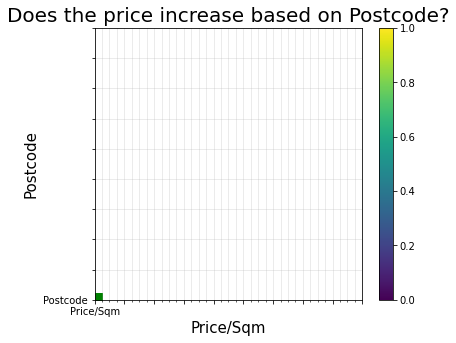

In [37]:

major_ticks = np.arange(0, 200, 20)                                              
minor_ticks = np.arange(0, 180, 5)  

fig = plt.figure(figsize = (6,5))  
ax = fig.add_subplot(1,1,1) 


s = ax.scatter('Price/Sqm', 'Postcode', c = 'green',data = findingAvg, cmap = 'Blues_r', marker = 's',s = 190)
# ax.axis([findingAvg['Price/Sqm'].min()-10, findingAvg['Postcode'].max()+10, findingAvg['Price/Sqm'].min()-10])
ax.set_xticks(major_ticks)                                                       
ax.set_xticks(minor_ticks, minor=True)                                           
ax.set_yticks(major_ticks)
ax.grid(which='both', alpha = 0.3)                                                                                                           
ax.grid(which='major', alpha=0.3) 

ax.set_xlabel('Price/Sqm', fontsize=15);
ax.set_ylabel('Postcode', fontsize=15);
ax.set_title('Does the price increase based on Postcode?', size = 20)

cbar = plt.colorbar(mappable = s,ax = ax)

plt.show()